<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 1)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [461]:
df = pd.read_csv('Life_Expectancy.csv')
df.set_index('Country', inplace=True)
df.head()

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

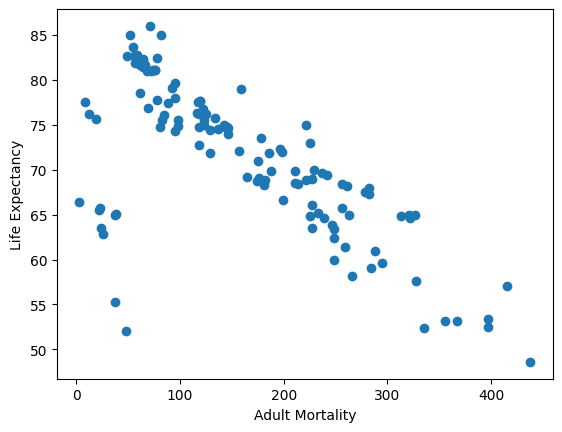

In [462]:
plt.scatter(df['Adult_Mortality'], df['Expected'])
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

#### Seems to be a negative correlation

In [463]:
X = sm.add_constant(df['Adult_Mortality'])
y = df[['Expected']]

In [464]:
SLR = sm.OLS(y,X).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           2.27e-20
Time:                        12:37:43   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     

#### We can see that slope is negative (-0.05)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

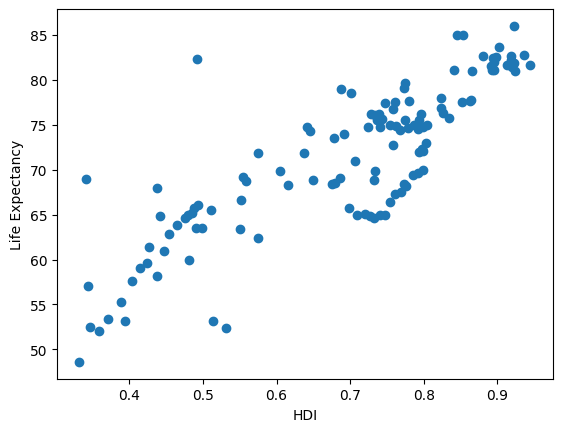

In [465]:
plt.scatter(df['Income_Index'], df['Expected'])
plt.xlabel('HDI')
plt.ylabel('Life Expectancy')
plt.show()

#### Seems to be a positive correlation

In [466]:
X = sm.add_constant(df['Income_Index'])
y = df[['Expected']]

In [467]:
SLR = sm.OLS(y,X).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.13e-34
Time:                        12:37:43   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081   

In [468]:
SLR.rsquared_adj

0.7085555861465764

#### Around 71% accuracy

In [469]:
np.array(df['Expected'].values)

array([65. , 77.5, 75.6, 52.4, 76.3, 74.8, 82.8, 81.5, 72.7, 76.9, 71.8,
       75.5, 72.3, 81.1, 71. , 60. , 69.8, 77.4, 65.7, 75. , 77.7, 74.5,
       68.7, 82.2, 52.5, 53.1, 85. , 76.1, 74.8, 63.5, 79.6, 78. , 79.1,
       85. , 86. , 76.2, 79. , 73.5, 77.6, 64.8, 69.9, 81.1, 82.4, 74.4,
       81. , 62.4, 81. , 71.9, 59. , 63.5, 75.8, 82.7, 68.3, 69.1, 75.5,
       68.9, 81.4, 82.5, 82.7, 76.2, 83.7, 72. , 63.4, 74.7, 74.9, 61.4,
       82. , 65.5, 75. , 78.5, 58.2, 74.6, 76.7, 68.8, 74.3, 66.6, 69.2,
       81.9, 81.6, 74.8, 69. , 53.2, 81.6, 76.2, 77.6, 74. , 75.5, 68.5,
       68.4, 77.5, 81.1, 82.3, 72.1, 75. , 73. , 70. , 69.6, 69.4, 68.4,
       68.2, 67.5, 67.3, 66.4, 65. , 64.9, 64.6, 64.8, 65.1, 65. , 66.1,
       65.7, 65.2, 64.6, 63.8, 62.8, 61. , 68. , 59.6, 57.6, 55.3, 53.4,
       52. , 57. , 48.6])

In [470]:
SLR.predict()

array([62.24036288, 74.20401067, 73.44037358, 64.44642559, 76.96158906,
       73.35552501, 81.67068447, 79.76159173, 74.07673782, 76.83431621,
       66.31309404, 75.60401201, 75.77370914, 79.88886458, 71.87067511,
       62.32521145, 67.54339825, 73.61007071, 71.53128084, 73.90704069,
       78.57371181, 75.51916344, 65.59188123, 80.90704737, 56.64035753,
       58.63429883, 77.76765044, 73.05855503, 72.6343122 , 63.04642426,
       74.79795063, 76.83431621, 74.71310206, 78.14946898, 81.07674451,
       73.27067644, 71.10703801, 70.68279518, 78.53128753, 60.62824013,
       73.05855503, 79.80401602, 79.8464403 , 74.50098065, 81.11916879,
       66.31309404, 78.61613609, 68.94339958, 59.48278449, 62.70702999,
       77.30098332, 80.90704737, 68.01006536, 71.02218945, 74.75552635,
       69.45249098, 80.94947166, 80.01613743, 79.29492462, 72.84643361,
       80.18583456, 75.56158772, 65.25248697, 75.81613342, 74.28885923,
       60.03430017, 79.93128887, 63.59793993, 75.30704203, 71.65

In [471]:
np.array(df['Expected'].values) - SLR.predict()

array([  2.75963712,   3.29598933,   2.15962642, -12.04642559,
        -0.66158906,   1.44447499,   1.12931553,   1.73840827,
        -1.37673782,   0.06568379,   5.48690596,  -0.10401201,
        -3.47370914,   1.21113542,  -0.87067511,  -2.32521145,
         2.25660175,   3.78992929,  -5.83128084,   1.09295931,
        -0.87371181,  -1.01916344,   3.10811877,   1.29295263,
        -4.14035753,  -5.53429883,   7.23234956,   3.04144497,
         2.1656878 ,   0.45357574,   4.80204937,   1.16568379,
         4.38689794,   6.85053102,   4.92325549,   2.92932356,
         7.89296199,   2.81720482,  -0.93128753,   4.17175987,
        -3.15855503,   1.29598398,   2.5535597 ,  -0.10098065,
        -0.11916879,  -3.91309404,   2.38386391,   2.95660042,
        -0.48278449,   0.79297001,  -1.50098332,   1.79295263,
         0.28993464,  -1.92218945,   0.74447365,  -0.55249098,
         0.45052834,   2.48386257,   3.40507538,   3.35356639,
         3.51416544,  -3.56158772,  -1.85248697,  -1.11

In [472]:
SLR.resid

Country
Afghanistan     2.759637
Albania         3.295989
Algeria         2.159626
Angola        -12.046426
Argentina      -0.661589
                 ...    
Venezuela      -3.079753
Viet Nam       -4.258540
Yemen          -5.149449
Zambia          0.529340
Zimbabwe       -7.403993
Length: 124, dtype: float64

In [473]:
print("Expected residual value:",np.sum(SLR.resid.values)/len(df['Expected']))

Expected residual value: -1.4440062049318165e-14


---

In [474]:
df.head(100)

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Serbia,Developing,229,14,97,2339,59.3,16,98,97,0.2,15543.676530,14356911,2.3,2.3,0.799,14.6,70.0
Seychelles,Developing,237,14,97,2123,58.7,16,98,97,0.3,15154.456870,14321676,2.3,2.4,0.792,14.3,69.6
Sierra Leone,Developing,242,14,97,629,58.1,17,97,97,0.3,14212.687000,14296868,2.3,2.4,0.785,14.0,69.4


<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [475]:
df.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ',
       ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [476]:
X = sm.add_constant(df[['Hepatitis ','Polio','Diphtheria ']])
y = df[['Expected']]

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [478]:
SLR = sm.OLS(y_train, X_train).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     5.737
Date:                Tue, 09 Jan 2024   Prob (F-statistic):            0.00130
Time:                        12:37:43   Log-Likelihood:                -296.38
No. Observations:                  86   AIC:                             600.8
Df Residuals:                      82   BIC:                             610.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.8729      4.372     13.008      

In [479]:
y_pred = SLR.predict(X_test)

In [480]:
rmse(y_test, y_pred.to_frame())[0]

8.89526881843037

In [481]:
100*SLR.rsquared_adj

14.323015295220065

#### Very low $R^2$ 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [482]:
# Assigning 1 to Developed and 0 to Developing countries
df['Status_Binary'] = np.where(df['Status'] == 'Developed', 1, 0)

In [483]:
X = sm.add_constant(df[['Status_Binary','Hepatitis ','Polio','Diphtheria ']])
y = df[['Expected']]

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [485]:
SLR = sm.OLS(y_train, X_train).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     9.937
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.36e-06
Time:                        12:37:43   Log-Likelihood:                -287.41
No. Observations:                  86   AIC:                             584.8
Df Residuals:                      81   BIC:                             597.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            57.7014      3.968     14.543

In [486]:
y_pred = SLR.predict(X_test)

In [487]:
rmse(y_test, y_pred.to_frame())[0]

7.789226826432632

In [488]:
100*SLR.rsquared_adj

29.60547151264914

#### RMSE slightly decreased and $R^2$ has doubled. Positive effect on model.

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [489]:
X = sm.add_constant(df.drop(columns=['Status', 'Expected'], axis=1))
y = df[['Expected']]

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [491]:
SLR = sm.OLS(y_train, X_train).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     25.86
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           6.12e-23
Time:                        12:37:43   Log-Likelihood:                -220.92
No. Observations:                  86   AIC:                             475.8
Df Residuals:                      69   BIC:                             517.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 56.6185      4

In [492]:
100*SLR.rsquared_adj

82.39509027071504

#### Good Accuracy !! 

In [493]:
SLR.pvalues

const                 3.839678e-19
Adult_Mortality       2.751463e-05
Infant_Deaths         9.472853e-01
Hepatitis             2.253481e-01
Measles               3.907996e-01
 BMI                  3.988230e-01
Underfive_Deaths      9.949172e-01
Polio                 2.568739e-01
Diphtheria            4.365604e-01
 HIV                  6.940152e-04
GDP                   1.998142e-01
Population            9.685854e-03
Malnourished10_19     1.764131e-01
Malnourished5_9       4.914769e-01
Income_Index          4.153984e-02
Schooling             2.566680e-01
Status_Binary         1.844904e-01
dtype: float64

In [494]:
for i,j in SLR.pvalues.to_dict().items():
    if j > 0.05:
        print(f"{i}                  -----> Insignificant")
    else:
        print(f"{i}                  -----> Significant")

const                  -----> Significant
Adult_Mortality                  -----> Significant
Infant_Deaths                  -----> Insignificant
Hepatitis                   -----> Insignificant
Measles                   -----> Insignificant
 BMI                   -----> Insignificant
Underfive_Deaths                   -----> Insignificant
Polio                  -----> Insignificant
Diphtheria                   -----> Insignificant
 HIV                  -----> Significant
GDP                  -----> Insignificant
Population                  -----> Significant
Malnourished10_19                   -----> Insignificant
Malnourished5_9                  -----> Insignificant
Income_Index                  -----> Significant
Schooling                  -----> Insignificant
Status_Binary                  -----> Insignificant


In [495]:
print('Significant features are',list(SLR.pvalues[SLR.pvalues < 0.05].index))

Significant features are ['const', 'Adult_Mortality', ' HIV', 'Population', 'Income_Index']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### SST = SSR + SSE

In [496]:
X = sm.add_constant(df[['Status_Binary','Income_Index']])
y = df[['Expected']]

In [497]:
SLR = sm.OLS(y, X).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     155.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           4.13e-34
Time:                        12:37:43   Log-Likelihood:                -361.57
No. Observations:                 124   AIC:                             729.1
Df Residuals:                     121   BIC:                             737.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            43.3786      1.885     23.009

In [498]:
y_pred = SLR.predict()

In [499]:
np.sum(np.square(y_pred - y.mean()[0]))

6344.3484947268835

In [500]:
np.sum(np.square(SLR.resid))

2475.456989144078

In [501]:
print('SSR =',np.sum(np.square(y_pred - y.mean()[0])))
print('SSE =',np.sum(np.square(SLR.resid)))
print('SST = SSR + SSE =',np.sum(np.square(y_pred - y.mean()[0])) + np.sum(np.square(SLR.resid)))

SSR = 6344.3484947268835
SSE = 2475.456989144078
SST = SSR + SSE = 8819.805483870961


In [502]:
print('RMSE =',rmse(np.array(y_test.values), y_pred)[0])

RMSE = 11.807953106820488


#### Very low RMSE. Which is good.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [503]:
SLR.conf_int()

,0,1
const,39.646180,47.110951
Status_Binary,-0.099284,5.056249
Income_Index,34.221832,45.301005


In [504]:
print('Lower Bound =',SLR.conf_int().iloc[2,0])
print('Upper Bound =',SLR.conf_int().iloc[2,1])

Lower Bound = 34.22183189643261
Upper Bound = 45.301004875212705


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Case 1: Adult_Mortality, Infant_Deaths, Underfive_Deaths

In [505]:
X = sm.add_constant(df[['Adult_Mortality', 'Infant_Deaths', 'Underfive_Deaths ']])
y = df[['Expected']]

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [507]:
SLR = sm.OLS(y_train, X_train).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     40.71
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           3.26e-16
Time:                        12:37:43   Log-Likelihood:                -265.35
No. Observations:                  86   AIC:                             538.7
Df Residuals:                      82   BIC:                             548.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.2253      1.08

In [508]:
y_pred = SLR.predict(X_test)

In [509]:
print('Total Variation for observed values is',rmse(y_test, y_pred.to_frame())[0])

Total Variation for observed values is 11.000482919208661


In [510]:
print('R2 Adjusted =',100*SLR.rsquared_adj,'%')

R2 Adjusted = 58.36273864232198 %


#### Case 2: Population and Mortality.

In [511]:
X = sm.add_constant(df[['Adult_Mortality', 'Infant_Deaths', 'Underfive_Deaths ','Population']])
y = df[['Expected']]

In [512]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [513]:
SLR = sm.OLS(y_train, X_train).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     30.54
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.70e-15
Time:                        12:37:44   Log-Likelihood:                -265.03
No. Observations:                  86   AIC:                             540.1
Df Residuals:                      81   BIC:                             552.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.2991      1.09

In [514]:
y_pred = SLR.predict(X_test)

In [515]:
print('Total Variation for observed values is',rmse(y_test, y_pred.to_frame())[0])

Total Variation for observed values is 11.50961829342646


In [516]:
print('R2 Adjusted =',100*SLR.rsquared_adj,'%')

R2 Adjusted = 58.16324875757879 %


#### The information of population didn't made much difference to the model. In fact Adjusted $R^2$ has very slightly come down.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

> #### $H_0$ : The regression model is not significant

> #### $H_a$ : The regression model is significant

In [517]:
X = sm.add_constant(df.drop(columns=['Status','Expected']))
y = df[['Expected']]

In [518]:
SLR = sm.OLS(y, X).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.94e-36
Time:                        12:37:44   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.0318      3

In [519]:
SLR.f_pvalue

1.9430668554848386e-36

#### Since the p-value  for F-statistic is less than the significance level 0.05, hence we can reject $H_0$ and conclude that the regression model is  significant.

In [520]:
100*SLR.rsquared

84.84171838775856

In [521]:
100*SLR.rsquared_adj

82.57505945508694

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

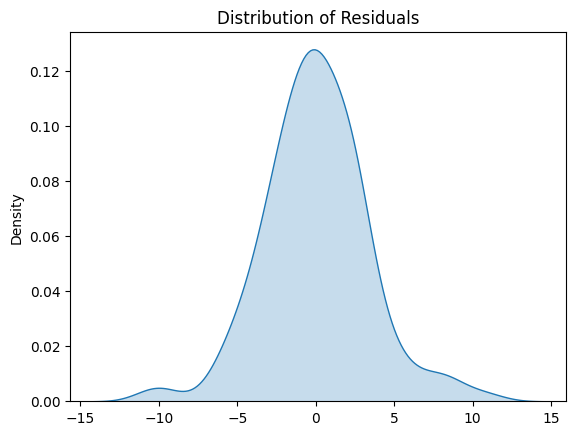

In [522]:
sns.kdeplot(SLR.resid.values, fill=True)
plt.title('Distribution of Residuals')
plt.show()

In [523]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(SLR.resid.values)
print('Wilk Shapiro P-value =',p_value)

Wilk Shapiro P-value = 0.03209252282977104


#### With Significance level of 95%, the resuiduals are not normal as p-value is less than 0.05.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [524]:
X = sm.add_constant(df.drop(columns=['Status','Expected']))
X['Interaction'] = X['Status_Binary']*X['GDP']
y = df[['Expected']]

In [525]:
SLR = sm.OLS(y, X).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     36.30
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           2.14e-36
Time:                        12:37:44   Log-Likelihood:                -321.30
No. Observations:                 124   AIC:                             678.6
Df Residuals:                     106   BIC:                             729.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.7216      3

In [526]:
100*SLR.rsquared

85.34177170311085

In [527]:
100*SLR.rsquared_adj

82.9909237687041

#### There isn't much change in $R^2$ and Adjusted $R^2$ with adding Interaction feature.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [528]:
X = df.drop(columns=['Status','Expected'])
y = df[['Expected']]

In [529]:
SLR = sm.OLS(y, X).fit()
print(SLR.summary())

                                 OLS Regression Results                                
Dep. Variable:               Expected   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              815.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):                   1.01e-104
Time:                        12:37:44   Log-Likelihood:                         -408.05
No. Observations:                 124   AIC:                                      848.1
Df Residuals:                     108   BIC:                                      893.2
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [530]:
100*SLR.rsquared_adj

99.05684545177449

In [531]:
SLR.resid.sum()

67.24460323651755

#### Adjusted $R^2$ is very high and residuals sum is also far from zero. Since there is no constant the regression line would pass through origin i.e., when all values are 0 then Expected value will also be zero which doesn't make sense.

---

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [532]:
df = pd.read_csv('LungCapdata.csv')
df.head()

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     654 non-null    int64  
 1   Height  654 non-null    float64
 2   Gender  654 non-null    int64  
 3   Smoke   654 non-null    int64  
 4   FEV     654 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 25.7 KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Preliminary Points to check:-
* ##### Target Variable should be Numeric -- Checked
* ##### Check for Multi Collinearity -- To be Checked

In [534]:
df.head()

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895


In [535]:
df[['Age','Height']].corr()

,Age,Height
Age,1.000000,0.791944
Height,0.791944,1.000000


#### There is high correlation between Age and Height. Let's Tackle MultiCollinearity in general.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Variance Inflation Factor VIF = $1/(1-R^2)$

* ##### If VIF > 5, then High Correlation
* ##### If 5 < VIF < 1, then Moderate Correlation
* ##### If VIF = 1, then No Correlation

In [536]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [537]:
X = df.drop('FEV', axis=1)

In [538]:
X.values

array([[ 9. , 57. ,  0. ,  0. ],
       [ 8. , 67.5,  0. ,  0. ],
       [ 7. , 54.5,  0. ,  0. ],
       ...,
       [18. , 60. ,  0. ,  0. ],
       [16. , 63. ,  0. ,  1. ],
       [15. , 66.5,  0. ,  0. ]])

In [539]:
a = pd.DataFrame()
a['Features'] = X.columns
a['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [540]:
a

,Features,VIF
0,Age,24.322098
1,Height,24.524524
2,Gender,2.130851
3,Smoke,1.342164


#### 'Height' has Highest VIF, dropping that feature.

In [541]:
X.drop('Height', axis=1, inplace=True)

#### Repeating the VIF again..

In [542]:
a = pd.DataFrame()
a['Features'] = X.columns
a['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [543]:
a

,Features,VIF
0,Age,2.307311
1,Gender,1.977845
2,Smoke,1.238003


#### All features have a VIF < 5 so we can retain them for building the regression model 

In [ ]:
"""
while True:
    a = pd.DataFrame()
    a['Features'] = predictor_variables.columns
    a['VIF'] = [variance_inflation_factor(predictor_variables.values, i) for i in range(len(predictor_variables.columns))]

    for i in a.index:
        if a.loc[i]['VIF'] == np.max(a['VIF']) and a.loc[i]['VIF'] > 10:
            predictor_variables.drop(a.loc[i]['Features'], axis=1, inplace=True)
    
    if len(a[a['VIF'] < 10]) == len(a):
        break
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Examining the scatter plot between fitted values and residuals provides valuable insights into the appropriateness of the regression model and helps identify potential issues such as heteroscedasticity, outliers, or violations of other assumptions. Ideally, you want to see a random scatter of points with no discernible pattern.

In [544]:
X = sm.add_constant(df.drop(columns=['Height','FEV']))
y = df[['FEV']]

In [545]:
SLR = sm.OLS(y,X).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     337.9
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.45e-132
Time:                        12:37:44   Log-Likelihood:                -526.84
No. Observations:                 654   AIC:                             1062.
Df Residuals:                     650   BIC:                             1080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2378      0.080      2.964      0.0

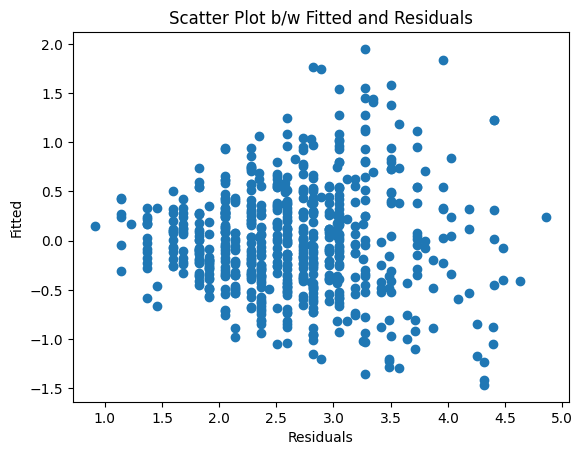

In [546]:
plt.scatter(np.array(SLR.predict()), np.array(SLR.resid))
plt.ylabel('Fitted')
plt.xlabel('Residuals')
plt.title('Scatter Plot b/w Fitted and Residuals')
plt.show()

#### Because above plot doesn't show a distinctive pattern between fitted values and residuals, we can conclude that model accurately captures the relationship between response and predictor variables.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [547]:
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     337.9
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.45e-132
Time:                        12:37:45   Log-Likelihood:                -526.84
No. Observations:                 654   AIC:                             1062.
Df Residuals:                     650   BIC:                             1080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2378      0.080      2.964      0.0

In [548]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(SLR.resid)

1.5969678178341284

#### Because the value is close to 2, will we take it as no correlation between residuals. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

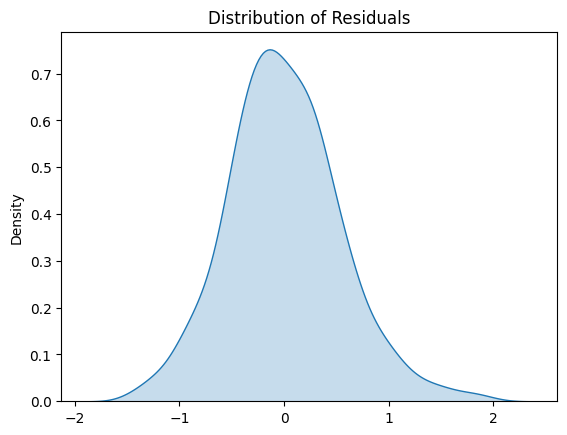

In [549]:
sns.kdeplot(SLR.resid, fill=True)
plt.title('Distribution of Residuals')
plt.show()

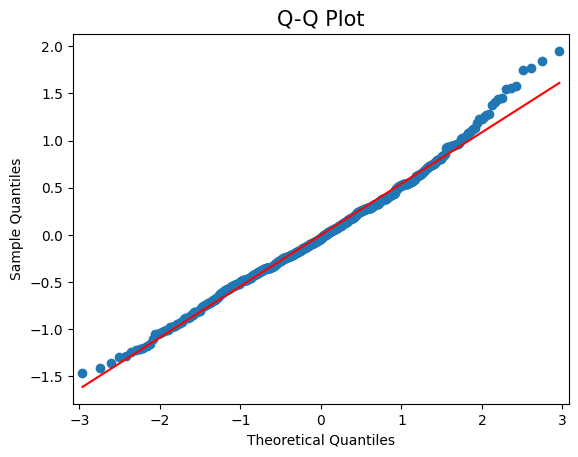

In [550]:
from statsmodels.graphics.gofplots import qqplot
qqplot(SLR.resid, line = 'r')
plt.title('Q-Q Plot', fontsize = 15)
plt.show()

#### Seems to be deflection in later Quantiles. Let's statistically test for Normality

In [551]:
test_stat, p_value = shapiro(SLR.resid)
print('P-value =',p_value)

P-value = 0.0005548810586333275


#### As Shapiro's P-value is less than 0.05, we can reject the $H_0$ that residuals are Normal.

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Consider the full model. Calculate the mean square error and the root mean square error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [552]:
y_pred = SLR.predict()

In [553]:
print('MSE =',mean_squared_error(y['FEV'], pd.Series(y_pred)))
print('RMSE =',rmse(y['FEV'], pd.Series(y_pred)))

MSE = 0.29324846507820534
RMSE = 0.5415242054407221


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [554]:
print('MAE =',mean_absolute_error(y['FEV'], pd.Series(y_pred)))
print('MAPE =',mean_absolute_percentage_error(y['FEV'], pd.Series(y_pred)))

MAE = 0.4230011019786966
MAPE = 0.16943351032455398


#### As you can see, the value of RMSE is greater than the value of MAE. The reason for this is that the RMSE punishes the model for large error terms. Thus, RMSE is a robust method that is generally used.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the full model, has the model overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [555]:
X = sm.add_constant(df.drop('FEV', axis=1))
y = df[['FEV']]

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [557]:
SLR = sm.OLS(y_train, X_train).fit()
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     363.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.16e-139
Time:                        12:37:45   Log-Likelihood:                -249.64
No. Observations:                 457   AIC:                             509.3
Df Residuals:                     452   BIC:                             529.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4204      0.275    -16.098      0.0

In [558]:
y_pred_of_train = SLR.predict(X_train)
y_pred_of_test = SLR.predict(X_test)

In [559]:
print('RMSE on Train Data =',rmse(y_train['FEV'], y_pred_of_train))
print('RMSE on Test Data =',rmse(y_test['FEV'], y_pred_of_test))

RMSE on Train Data = 0.41783251140058153
RMSE on Test Data = 0.39665538993268534


#### Generally , if the model created shows less error on training data and more on test data, that means model learned the training data too well and is considered overfitted. In our case train error is more so we can conclude that model is not overfitted.

In [560]:
SLR.rsquared

0.7626821431304026

#### Also $R^2$ is good indicator whether the model has overfiited or not. Overfitted model whould have $R^2$ very close to 100%. Our model has moderate $R^2$ so we can say it's not overfitted.

## THE END